# Project: Data Analysis on Income
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## 1. Introduction

The objective of this project is to explore how income has changed over the years (1d exploration), and how independent and dependent factors affect income level (2d exploration). Specifically, we will explore how GDP per capita PPP changed from 1800 to 2011, as well as analyze how country location, literacy rate, and level of energy can affect income level. Also, we will look at how income level is associated with perceived level of corruption. All data is obtained from Gapminder World. 

For income level, dataset on GDP per capita PPP for 190+ countries is selected. Data originated from World Bank's 2011 International Comparison Program (ICP) report. Data has also been adjust for inflation.

It is hypothesized that the following three independent factors will affect income level:
(1) country location (a country's region/continent)
(2) literacy rate (percentage of literate adult >15 years)
(3) level of energy use (energy use per person)

Finally, it is hypothesized that income level affects the level of perceived corruption in a country.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## 2. Data Wrangling

### 2.1 General Properties

#### 2.1.1 General Properties of Dataset #1: Income per person - GDP per capita PPP

In [2]:
df_gdp = pd.read_csv("income_per_person_gdppercapita_ppp_inflation_adjusted.csv")

In [3]:
df_gdp.head()
# observations:
#1. the countries are already listed in alphabetical order
#2. years extend till 2040. wonder how the values are predicted 
#(i.e. is it based on trendline from the last 10 years before dataset is created?) will explore in EDA section

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
0,Afghanistan,603,603,603,603,603,603,603,603,603,...,2420,2470,2520,2580,2640,2700,2760,2820,2880,2940
1,Albania,667,667,667,667,667,668,668,668,668,...,18500,18900,19300,19700,20200,20600,21100,21500,22000,22500
2,Algeria,715,716,717,718,719,720,721,722,723,...,15600,15900,16300,16700,17000,17400,17800,18200,18600,19000
3,Andorra,1200,1200,1200,1200,1210,1210,1210,1210,1220,...,73200,74800,76400,78100,79900,81600,83400,85300,87200,89100
4,Angola,618,620,623,626,628,631,634,637,640,...,6270,6410,6550,6700,6850,7000,7150,7310,7470,7640


In [4]:
df_gdp.info()
# observations:
# 1. number of countries is valid (presently there are 195 countries in the world - according to Wikipedia)
# 2. info() function is not that useful for time series data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Columns: 242 entries, country to 2040
dtypes: int64(241), object(1)
memory usage: 365.0+ KB


In [5]:
df_gdp.describe()
# observations:
# 1. general rising trend in mean GDP per capita -> likely due to inflation. trend is valid

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
count,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,...,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.00000,193.000000,193.000000,193.000000
mean,947.782383,948.269430,951.217617,950.911917,952.772021,953.202073,954.305699,953.979275,950.911917,952.202073,...,23851.284974,24367.823834,24912.518135,25465.181347,26028.062176,26607.435233,27199.07772,27804.968912,28415.119171,29039.730570
std,508.348372,506.753967,516.692581,511.552526,518.974690,513.492023,514.667191,508.132446,490.318368,492.600302,...,24946.900512,25460.500225,26036.659984,26630.953200,27203.647785,27809.921089,28446.04490,29092.365685,29694.419993,30348.528109
min,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,...,718.000000,734.000000,750.000000,767.000000,784.000000,801.000000,819.00000,837.000000,856.000000,875.000000
25%,608.000000,608.000000,608.000000,609.000000,609.000000,609.000000,610.000000,610.000000,610.000000,611.000000,...,4840.000000,4950.000000,5060.000000,5170.000000,5290.000000,5400.000000,5520.00000,5650.000000,5770.000000,5900.000000
50%,847.000000,847.000000,847.000000,847.000000,848.000000,848.000000,849.000000,850.000000,850.000000,851.000000,...,15600.000000,15900.000000,16300.000000,16700.000000,17000.000000,17400.000000,17800.00000,18200.000000,18600.000000,19000.000000
75%,1100.000000,1100.000000,1110.000000,1110.000000,1110.000000,1120.000000,1120.000000,1130.000000,1130.000000,1140.000000,...,35900.000000,36700.000000,37500.000000,38400.000000,39200.000000,40100.000000,41000.00000,41900.000000,42800.000000,43800.000000
max,4230.000000,4160.000000,4390.000000,4300.000000,4500.000000,4240.000000,4270.000000,3910.000000,3480.000000,3430.000000,...,150000.000000,153000.000000,156000.000000,160000.000000,163000.000000,167000.000000,171000.00000,175000.000000,178000.000000,182000.000000


In [6]:
df_gdp.dropna()
# observations:
#since all 193 countries are returned as output, there is no null data

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
0,Afghanistan,603,603,603,603,603,603,603,603,603,...,2420,2470,2520,2580,2640,2700,2760,2820,2880,2940
1,Albania,667,667,667,667,667,668,668,668,668,...,18500,18900,19300,19700,20200,20600,21100,21500,22000,22500
2,Algeria,715,716,717,718,719,720,721,722,723,...,15600,15900,16300,16700,17000,17400,17800,18200,18600,19000
3,Andorra,1200,1200,1200,1200,1210,1210,1210,1210,1220,...,73200,74800,76400,78100,79900,81600,83400,85300,87200,89100
4,Angola,618,620,623,626,628,631,634,637,640,...,6270,6410,6550,6700,6850,7000,7150,7310,7470,7640
5,Antigua and Barbuda,757,757,757,757,757,757,757,758,758,...,25700,26200,26800,27400,28000,28600,29300,29900,30600,31300
6,Argentina,1510,1510,1510,1510,1510,1510,1510,1510,1510,...,24100,24600,25200,25700,26300,26900,27500,28100,28700,29300
7,Armenia,514,514,514,514,514,514,514,514,514,...,12000,12300,12600,12800,13100,13400,13700,14000,14300,14700
8,Australia,814,816,818,820,822,824,825,827,829,...,58500,59800,61100,62400,63800,65200,66700,68200,69700,71200
9,Austria,1850,1850,1860,1870,1880,1880,1890,1900,1910,...,53900,55100,56300,57600,58900,60200,61500,62900,64300,65700


In [7]:
#investigate for duplicated values
df_gdp.drop_duplicates(keep=False)
# observations:
# no duplicated country found, since all 193 countries are returned as output

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
0,Afghanistan,603,603,603,603,603,603,603,603,603,...,2420,2470,2520,2580,2640,2700,2760,2820,2880,2940
1,Albania,667,667,667,667,667,668,668,668,668,...,18500,18900,19300,19700,20200,20600,21100,21500,22000,22500
2,Algeria,715,716,717,718,719,720,721,722,723,...,15600,15900,16300,16700,17000,17400,17800,18200,18600,19000
3,Andorra,1200,1200,1200,1200,1210,1210,1210,1210,1220,...,73200,74800,76400,78100,79900,81600,83400,85300,87200,89100
4,Angola,618,620,623,626,628,631,634,637,640,...,6270,6410,6550,6700,6850,7000,7150,7310,7470,7640
5,Antigua and Barbuda,757,757,757,757,757,757,757,758,758,...,25700,26200,26800,27400,28000,28600,29300,29900,30600,31300
6,Argentina,1510,1510,1510,1510,1510,1510,1510,1510,1510,...,24100,24600,25200,25700,26300,26900,27500,28100,28700,29300
7,Armenia,514,514,514,514,514,514,514,514,514,...,12000,12300,12600,12800,13100,13400,13700,14000,14300,14700
8,Australia,814,816,818,820,822,824,825,827,829,...,58500,59800,61100,62400,63800,65200,66700,68200,69700,71200
9,Austria,1850,1850,1860,1870,1880,1880,1890,1900,1910,...,53900,55100,56300,57600,58900,60200,61500,62900,64300,65700


#### 2.1.2 General Properties of Dataset #2: Country Region/Continent

Objective of using dataset: Explore how each region's income level changed over the years

Dataset is downloaded in excel, with several readme tabs. The relevant region/continent tab is extracted and saved as csv. "eight_regions" column is determined as the most descriptive variable to group the countries. 

In [8]:
df_continent = pd.read_csv("Data Geographies - v1 - by Gapminder_converted.csv")

In [9]:
df_continent.head()
# observations:
#eight_regions is the most descriptive variable with no null values (see next cell)

,geo,name,four_regions,eight_regions,six_regions,members_oecd_g77,Latitude,Longitude,UN member since,World bank region,"World bank, 4 income groups 2017","World bank, 3 income groups 2017"
0,afg,Afghanistan,asia,asia_west,south_asia,g77,33.00000,66.00000,19-11-1946,South Asia,Low income,NaN
1,alb,Albania,europe,europe_east,europe_central_asia,others,41.00000,20.00000,14-12-1955,Europe & Central Asia,Upper middle income,NaN
2,dza,Algeria,africa,africa_north,middle_east_north_africa,g77,28.00000,3.00000,8-10-1962,Middle East & North Africa,Upper middle income,NaN
3,and,Andorra,europe,europe_west,europe_central_asia,others,42.50779,1.52109,28-7-1993,Europe & Central Asia,High income,NaN
4,ago,Angola,africa,africa_sub_saharan,sub_saharan_africa,g77,-12.50000,18.50000,1-12-1976,Sub-Saharan Africa,Lower middle income,NaN


In [10]:
df_continent.info()
#observations:
#this dataset has 4 extra countries as compared to GDP per capita dataset, which has 193 countries  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 12 columns):
geo                                 197 non-null object
name                                197 non-null object
four_regions                        197 non-null object
eight_regions                       197 non-null object
six_regions                         197 non-null object
members_oecd_g77                    196 non-null object
Latitude                            197 non-null float64
Longitude                           197 non-null float64
UN member since                     193 non-null object
World bank region                   196 non-null object
World bank, 4 income groups 2017    196 non-null object
World bank, 3 income groups 2017    0 non-null float64
dtypes: float64(3), object(9)
memory usage: 18.5+ KB


#### 2.1.3 General Properties of Dataset #3: Literacy Rate

In [11]:
df_literacy = pd.read_csv("literacy_rate_adult_total_percent_of_people_ages_15_and_above.csv")

In [12]:
df_literacy.head()

,country,1975,1976,1977,1978,1979,1980,1981,1982,1983,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Afghanistan,NaN,NaN,NaN,NaN,18.2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,95.9,NaN,NaN,96.8
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,69.9,NaN,NaN,NaN,72.7,NaN,NaN,NaN,NaN,NaN
3,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.4
4,Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0


In [13]:
df_literacy.isnull()
#observations:
#many null values. there might not be any data left to analyze if we dropna. 
#alternatively, filling in na with mean might not make sense, because of the lack of data

,country,1975,1976,1977,1978,1979,1980,1981,1982,1983,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,False,True,True,True,True,False,True,True,True,True,...,True,True,True,True,True,True,True,True,True,False
1,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,False,True,True,False
2,False,True,True,True,True,True,True,True,True,True,...,False,True,True,True,False,True,True,True,True,True
3,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,False
4,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,False
5,False,True,True,True,True,True,False,True,True,True,...,True,True,True,True,True,True,True,True,True,False
6,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,False
7,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,False,True,False,True,True
8,False,True,True,True,True,True,True,False,True,True,...,True,True,True,True,True,True,True,True,False,True
9,False,True,True,True,True,True,True,False,True,True,...,True,True,True,True,True,True,True,True,True,False


#### 2.1.4 General Properties of Dataset #4: Energy Use per Person

In [14]:
df_energyuse = pd.read_csv("energy_use_per_person.csv")

In [15]:
df_energyuse.head()

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,707.0,680.0,711.0,732.0,729.0,765.0,688.0,801.0,808.0,NaN
1,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1030.0,1070.0,1070.0,1150.0,1110.0,1140.0,1220.0,1240.0,1320.0,NaN
2,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,456.0,470.0,491.0,514.0,521.0,522.0,553.0,534.0,545.0,NaN
3,Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1580.0,1600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1840.0,1850.0,1920.0,1850.0,1910.0,1930.0,1920.0,1950.0,2020.0,NaN


#### 2.1.5 General Properties of Dataset #5: Corruption Perception Index

 Objective of using dataset: Explore if GDP has a correlation to levels of perceived corruption
 
 Description: Higher values indicate less corruption

In [16]:
df_corruption = pd.read_csv("corruption_perception_index_cpi_pre2012.csv")

In [17]:
df_corruption.head()

,country,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.5,NaN,1.8,1.5,1.3,1.4,1.52
1,Albania,NaN,NaN,NaN,NaN,2.3,NaN,NaN,2.5,2.5,2.5,2.4,2.6,2.9,3.4,3.2,3.3,3.05
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.6,2.7,2.8,3.1,3.0,3.2,2.8,2.9,2.90
3,Angola,NaN,NaN,NaN,NaN,NaN,1.7,NaN,1.7,1.8,2.0,2.0,2.2,2.2,1.9,1.9,1.9,2.01
4,Argentina,5.24,3.41,2.81,3.0,3.0,3.5,3.5,2.8,2.5,2.5,2.8,2.9,2.9,2.9,2.9,2.9,3.00


In [18]:
df_corruption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 18 columns):
country    182 non-null object
1995       38 non-null float64
1996       52 non-null float64
1997       50 non-null float64
1998       82 non-null float64
1999       96 non-null float64
2000       87 non-null float64
2001       89 non-null float64
2002       100 non-null float64
2003       130 non-null float64
2004       143 non-null float64
2005       156 non-null float64
2006       160 non-null float64
2007       177 non-null float64
2008       176 non-null float64
2009       176 non-null float64
2010       173 non-null float64
2011       178 non-null float64
dtypes: float64(17), object(1)
memory usage: 25.7+ KB


In [19]:
df_corruption.describe()
#observation:
# from 1995 to 2011, the perception that the countries are more corruption has been rising. 
# this perception can reflect the real world. but it could also be a product of inequality (ie poor people view rich peopel has corrupt)
# this is troubling, and is a reflection of potential instability in the world 

,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
count,38.000000,52.000000,50.0000,82.000000,96.000000,87.000000,89.000000,100.000000,130.000000,143.000000,156.000000,160.000000,177.000000,176.000000,176.000000,173.000000,178.000000
mean,5.893947,5.324615,5.6466,4.869512,4.588542,4.756322,4.713483,4.511000,4.197692,4.137063,4.047436,4.038125,3.949718,3.971591,3.981250,3.963006,3.984792
std,2.636372,2.639235,2.5650,2.415776,2.359298,2.392415,2.392469,2.365787,2.275943,2.219494,2.165580,2.132111,2.074004,2.096607,2.086704,2.076423,2.089246
min,1.940000,0.690000,1.7600,1.400000,1.500000,1.200000,0.400000,1.200000,1.300000,1.500000,1.700000,1.800000,1.400000,1.000000,1.100000,1.100000,0.983000
25%,3.245000,2.812500,3.0525,3.000000,2.675000,2.950000,2.800000,2.600000,2.425000,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000,2.400000,2.472500
50%,5.590000,5.015000,5.2250,4.200000,3.800000,4.100000,3.900000,3.700000,3.400000,3.300000,3.200000,3.150000,3.300000,3.200000,3.300000,3.200000,3.180000
75%,8.600000,7.850000,8.2275,6.400000,6.000000,6.400000,6.600000,6.075000,5.300000,5.100000,5.000000,5.025000,5.000000,5.100000,5.025000,4.900000,4.942500
max,9.550000,9.430000,9.9400,10.000000,10.000000,10.000000,9.900000,9.700000,9.700000,9.700000,9.700000,9.600000,9.400000,9.300000,9.400000,9.300000,9.460000


### 2.2 Data Cleaning

#### 2.2.1 Data Cleaning Dataset #2 (Regions)

Objective of 2nd Dataset: Explore how each region's income level changed over the years

"eight_regions" column is determined as the most descriptive variable to group the countries. Will also need to rename the column to prepare for merging

In [20]:
df_continent=df_continent.drop(['geo','four_regions','six_regions','members_oecd_g77','Latitude','Longitude','UN member since',
                                'World bank region','World bank, 4 income groups 2017','World bank, 3 income groups 2017'],
                               axis = 1)
df_continent

,name,eight_regions
0,Afghanistan,asia_west
1,Albania,europe_east
2,Algeria,africa_north
3,Andorra,europe_west
4,Angola,africa_sub_saharan
5,Antigua and Barbuda,america_north
6,Argentina,america_south
7,Armenia,europe_east
8,Australia,east_asia_pacific
9,Austria,europe_west


In [21]:
df_continent = df_continent.rename(columns = {"name":"country"})
df_continent = df_continent.rename(columns = {"eight_regions":"region"})

Before merging, we need to check if the datatypes are consistent:

In [22]:
df_gdp.country.dtype

dtype('O')

In [23]:
df_continent.country.dtype

dtype('O')

#### 2.2.2 Merging of Datasets #1 and #2 (Income Level with Regions)

In [24]:
df_gdp_merged =df_gdp.merge(df_continent, on = "country")

#ensure merge is successful
df_gdp_merged.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2032,2033,2034,2035,2036,2037,2038,2039,2040,region
0,Afghanistan,603,603,603,603,603,603,603,603,603,...,2470,2520,2580,2640,2700,2760,2820,2880,2940,asia_west
1,Albania,667,667,667,667,667,668,668,668,668,...,18900,19300,19700,20200,20600,21100,21500,22000,22500,europe_east
2,Algeria,715,716,717,718,719,720,721,722,723,...,15900,16300,16700,17000,17400,17800,18200,18600,19000,africa_north
3,Andorra,1200,1200,1200,1200,1210,1210,1210,1210,1220,...,74800,76400,78100,79900,81600,83400,85300,87200,89100,europe_west
4,Angola,618,620,623,626,628,631,634,637,640,...,6410,6550,6700,6850,7000,7150,7310,7470,7640,africa_sub_saharan


#### 2.2.3 Data Cleaning Dataset #3 (Literacy Rate)

During exploration of the dataset, it is observed that there are many null values. Attempts have been maded to drop the null values. But dropping the null values does not make sense, since all columns will be dropped in the process

An alternative will be to assign mean values to the null values. However, it is determined in the section 2.2.4 that such an attempt will create graphs very similar to an overall time series of the mean. This is because way too many datapoints are missing in this dataset. Assigning mean to null values skews the individual country/region time series towards the mean time series

#### 2.2.4 Merging of Datasets #2 and #3 (Literacy Rate with Regions) and Trimming

In [25]:
df_literacy_merged = df_literacy.merge(df_continent,on="country")

#ensure merge is successful
df_literacy_merged.head()

,country,1975,1976,1977,1978,1979,1980,1981,1982,1983,...,2003,2004,2005,2006,2007,2008,2009,2010,2011,region
0,Afghanistan,NaN,NaN,NaN,NaN,18.2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0,asia_west
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,95.9,NaN,NaN,96.8,europe_east
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,72.7,NaN,NaN,NaN,NaN,NaN,africa_north
3,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.4,africa_sub_saharan
4,Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0,america_north


In [26]:
region_lit = df_literacy_merged.groupby("region").mean()
region_lit

,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
region,,,,,,,,,,,,,,,,,,,,,
africa_north,NaN,38.20,NaN,NaN,NaN,NaN,NaN,30.300000,NaN,54.2,...,69.900000,NaN,70.900000,71.400000,69.550000,77.200000,66.350000,56.100000,75.550000,76.533333
africa_sub_saharan,13.445,35.31,NaN,38.2,19.666667,50.400000,57.300000,77.800000,NaN,32.1,...,60.714286,43.283333,52.950000,27.366667,45.020000,60.144444,69.200000,59.540000,58.412500,69.813636
america_north,NaN,NaN,NaN,NaN,NaN,88.700000,85.450000,34.700000,NaN,92.6,...,86.550000,58.700000,89.733333,84.800000,74.666667,86.650000,88.450000,88.750000,89.200000,91.722222
america_south,93.900,63.20,NaN,NaN,NaN,84.250000,83.300000,84.366667,NaN,NaN,...,95.700000,NaN,89.675000,90.350000,92.100000,91.862500,94.128571,92.222222,93.716667,94.366667
asia_west,56.550,36.50,82.3,NaN,42.500000,67.500000,46.928571,NaN,91.8,NaN,...,79.950000,85.650000,79.960000,76.583333,82.171429,92.500000,85.671429,88.620000,92.733333,78.607692
east_asia_pacific,NaN,99.60,NaN,NaN,68.350000,80.483333,77.800000,65.500000,78.6,NaN,...,NaN,92.600000,85.150000,83.100000,95.500000,50.600000,91.300000,83.250000,85.600000,89.525000
europe_east,61.600,NaN,NaN,NaN,NaN,82.300000,NaN,NaN,NaN,NaN,...,98.800000,NaN,95.366667,88.200000,88.100000,94.150000,95.900000,96.733333,96.200000,98.605882
europe_west,NaN,NaN,NaN,98.7,NaN,NaN,89.800000,NaN,NaN,NaN,...,NaN,NaN,99.600000,95.100000,NaN,97.900000,97.600000,97.700000,97.800000,98.020000


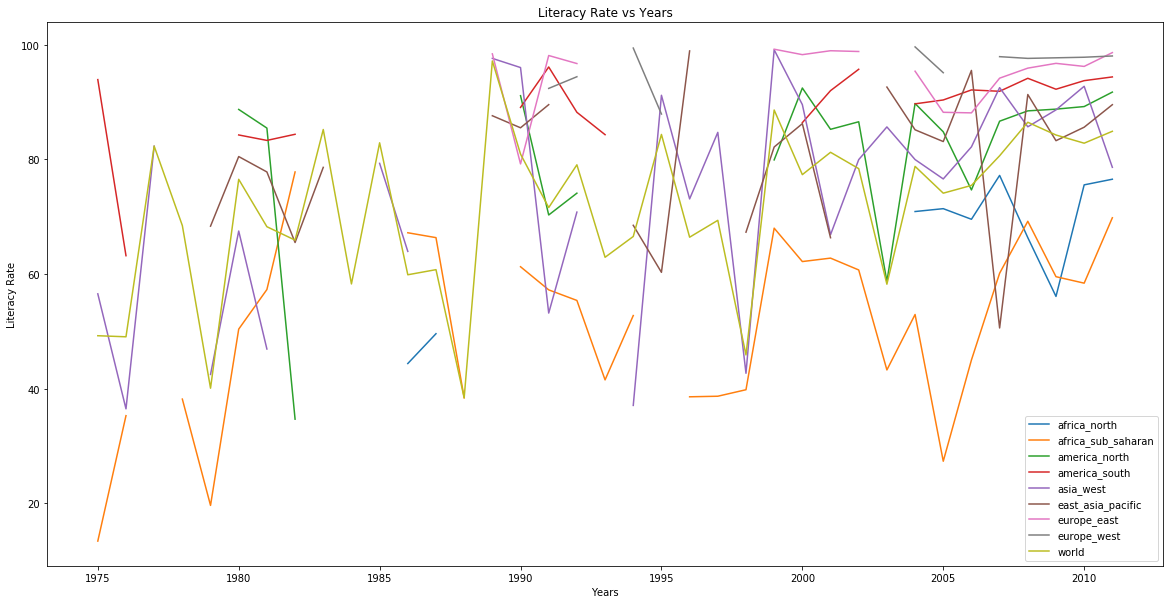

In [27]:
region1 = region_lit.iloc[0]
region2 = region_lit.iloc[1]
region3 = region_lit.iloc[2]
region4 = region_lit.iloc[3]
region5 = region_lit.iloc[4]
region6 = region_lit.iloc[5]
region7 = region_lit.iloc[6]
region8 = region_lit.iloc[7]

years = range(1975,2012)

plt.figure(figsize=(20,10))

plot = plt.plot(years, region1, years, region2, years, region3, years, region4, years, region5, years, region6, 
         years, region7, years, region8, years, df_literacy.mean())

plt.legend(plot[:],('africa_north', 'africa_sub_saharan', 'america_north','america_south','asia_west', 
           'east_asia_pacific','europe_east','europe_west','world'))

plt.title("Literacy Rate vs Years")
plt.ylabel("Literacy Rate")
plt.xlabel("Years");

Due to large number of null values, literacy rate is not meaningful to explore in terms of regions. 
Perhaps the only meaningful observation can be derived while looking at the world trendline: it shows a healthy increase from 50% in 1970s to 80% in 2018

In [28]:
#examine the trend of an individual country (ie China) 
df_literacy.iloc[29]
#observations:
#the literacy rate has consistent increasing trend. trend is valid. 
#this gives me confidence to continue using this dataset even though the null values are reassigned

country    Colombia
1975            NaN
1976            NaN
1977            NaN
1978            NaN
1979            NaN
1980            NaN
1981            NaN
1982            NaN
1983            NaN
1984            NaN
1985            NaN
1986            NaN
1987            NaN
1988            NaN
1989            NaN
1990            NaN
1991            NaN
1992            NaN
1993           81.4
1994            NaN
1995            NaN
1996           91.2
1997            NaN
1998            NaN
1999            NaN
2000            NaN
2001            NaN
2002            NaN
2003            NaN
2004           92.8
2005           92.8
2006           92.3
2007           92.7
2008           93.4
2009           93.2
2010           93.4
2011           93.6
Name: 29, dtype: object

To avoid the null values, the merged dataset is trimmed for the time period of interest: Years 2007 to 2011.

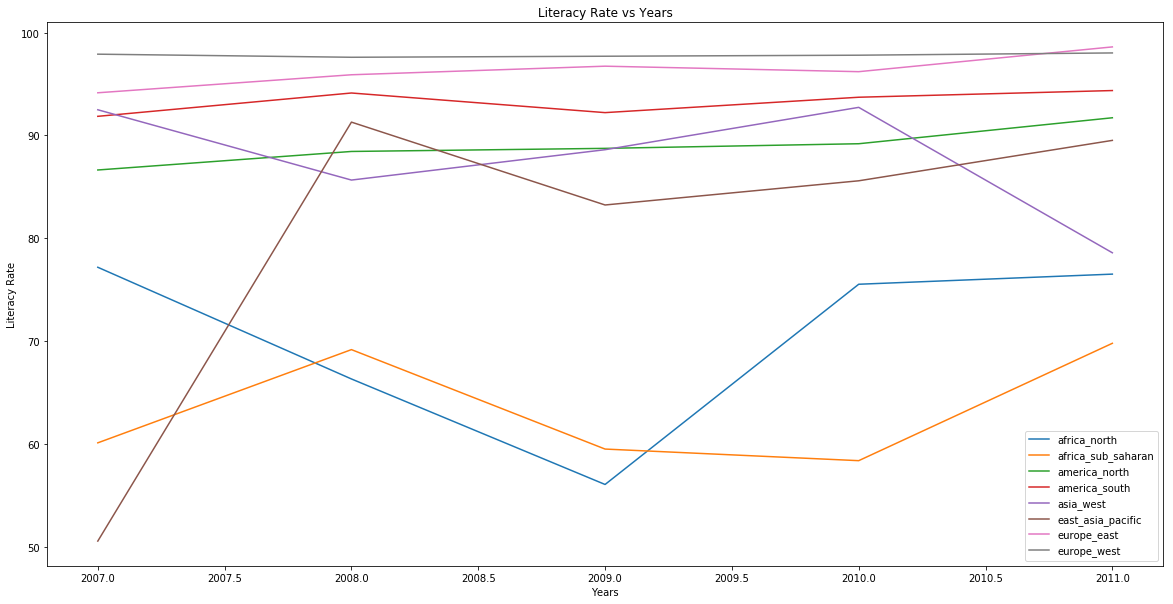

In [29]:
df_literacy_sliced = region_lit.loc[:,["2007","2008","2009","2010","2011"]]

region1 = df_literacy_sliced.iloc[0]
region2 = df_literacy_sliced.iloc[1]
region3 = df_literacy_sliced.iloc[2]
region4 = df_literacy_sliced.iloc[3]
region5 = df_literacy_sliced.iloc[4]
region6 = df_literacy_sliced.iloc[5]
region7 = df_literacy_sliced.iloc[6]
region8 = df_literacy_sliced.iloc[7]

years = range(2007,2012)

plt.figure(figsize=(20,10))

plot = plt.plot(years, region1, years, region2, years, region3, years, region4, years, region5, years, region6, 
         years, region7, years, region8)

plt.legend(plot[:],('africa_north', 'africa_sub_saharan', 'america_north','america_south','asia_west', 
           'east_asia_pacific','europe_east','europe_west'))

plt.title("Literacy Rate vs Years")
plt.ylabel("Literacy Rate")
plt.xlabel("Years");

Changes between 2007 and 2011 is much easier to view, because we eliminated the null values. We can see sharp increases for East APAC, whereas most other regions have relatively smaller changes over time. Will explore visualisation by using bar chart

In [30]:
df_lit_mean = df_literacy_sliced.mean(axis = 1)
df_lit_mean

region
africa_north          70.346667
africa_sub_saharan    63.422116
america_north         88.954444
america_south         93.259325
asia_west             87.626491
east_asia_pacific     80.055000
europe_east           96.317843
europe_west           97.804000
dtype: float64

To avoid repetitive code, barplot function is created to streamline to barplotting process

In [49]:
def barplot(title, ylabel, index, data, label):
    plt.figure(figsize = (20,10))
    plt.bar(index,data);
    plt.xticks(index,label,fontsize=13,rotation=30)
    plt.ylabel(ylabel,fontsize=13)
    plt.title(title);

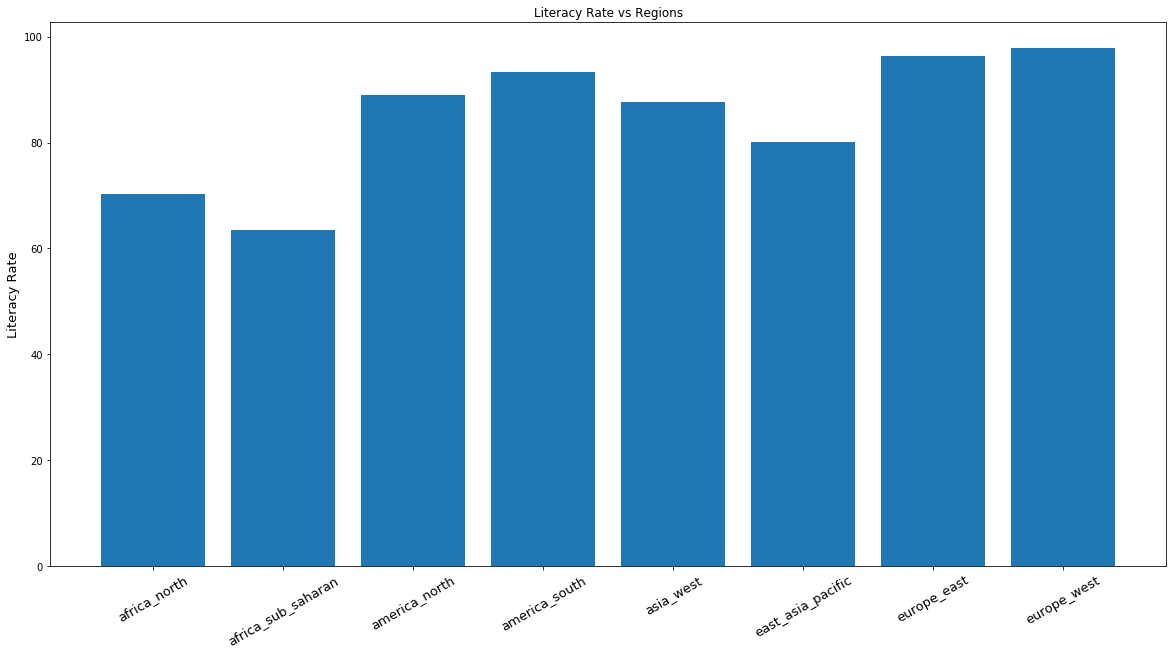

In [50]:
label = ['africa_north', 'africa_sub_saharan', 'america_north','america_south','asia_west', 
           'east_asia_pacific','europe_east','europe_west']
data = df_lit_mean
index = np.arange(len(label))    

barplot("Literacy Rate vs Regions", "Literacy Rate", index, data, label)

Bar chart is a cleaner visualisation as compared to time series, should we want to compare the mean or at a snapshot in time. With the exception of Africa, all other regions are above 80% literacy rate

#### 2.2.5 Comments about Data Cleaning Datasets #4 and #5 (Energy Use per person & Corruption Perception Index)

With reference to sections 2.2.3 and 2.2.4, it is determined that it will not be meaningful to reassign null values in datasets #4 and #5

#### 2.2.6 Merging of Datasets #2 and #4 (Energy Use per person with Regions) and Trimming

In [33]:
df_energyuse_merged = df_energyuse.merge(df_continent,on="country")

In [34]:
region_energyuse = df_energyuse_merged.groupby("region").mean()
region_energyuse

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
region,,,,,,,,,,,,,,,,,,,,,
africa_north,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1074.666667,1049.833333,1264.200000,1315.200000,1367.200000,1141.600000,1278.400000,1340.800000,1302.400000,NaN
africa_sub_saharan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,645.480909,647.896364,672.916667,677.500000,696.500000,673.250000,668.645833,709.483333,714.304545,NaN
america_north,4945.000000,4960.000000,5110.000000,5340.000000,5520.000000,5730.000000,5930.000000,6185.000000,6470.000000,6710.000000,...,2146.652174,2188.217391,2790.214286,2728.642857,2799.214286,2791.928571,2740.214286,2751.285714,2763.000000,5296.666667
america_south,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1094.166667,1078.250000,1175.636364,1166.909091,1241.909091,1247.909091,1310.909091,1296.090909,1214.000000,2030.000000
asia_west,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3444.560000,3428.960000,3624.739130,3449.521739,3508.826087,3531.173913,3695.913043,3627.130435,3886.142857,2780.000000
east_asia_pacific,1874.666667,1947.666667,1986.666667,2113.333333,2263.333333,2353.333333,2440.000000,2533.333333,2673.333333,2783.333333,...,1860.595833,1865.220833,2723.687500,2572.812500,2716.312500,2804.187500,2801.500000,2694.812500,2936.200000,4690.000000
europe_east,1294.500000,1317.500000,1385.500000,1451.000000,1557.000000,1588.666667,1666.000000,1698.000000,1782.333333,1930.666667,...,2570.739130,2596.565217,2601.478261,2403.260870,2520.086957,2547.565217,2505.521739,2458.869565,2458.956522,3458.571429
europe_west,2176.777778,2207.611111,2310.444444,2440.388889,2537.666667,2605.833333,2661.111111,2715.333333,2914.611111,3108.111111,...,4439.000000,4475.500000,4573.500000,4399.000000,4539.500000,4383.500000,4311.500000,4296.500000,4100.000000,4356.111111


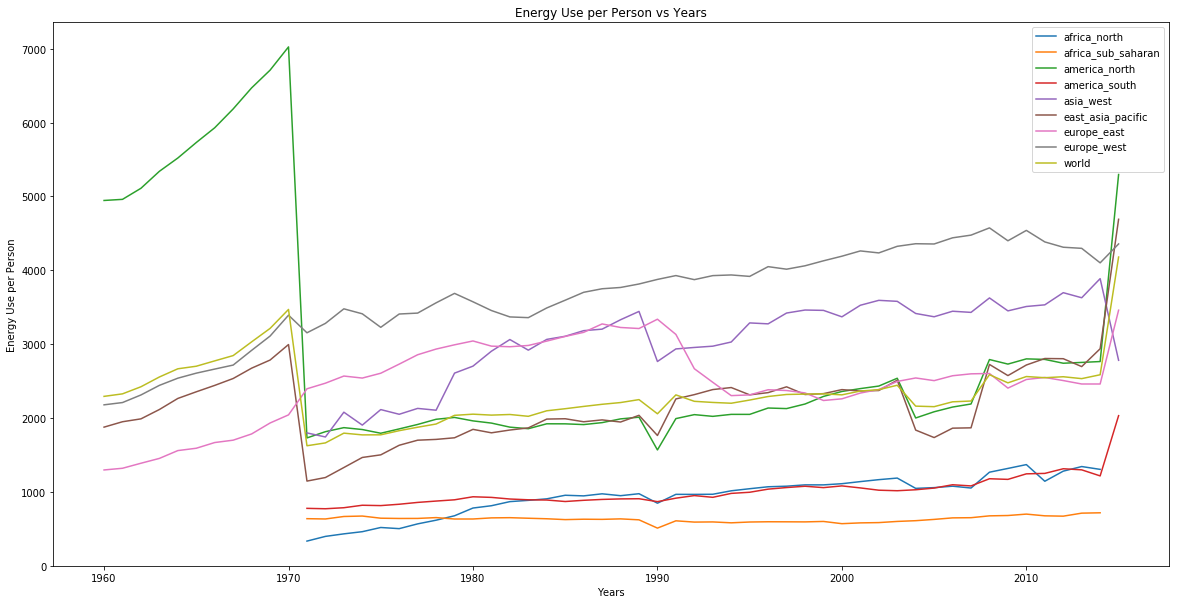

In [35]:
region1 = region_energyuse.iloc[0]
region2 = region_energyuse.iloc[1]
region3 = region_energyuse.iloc[2]
region4 = region_energyuse.iloc[3]
region5 = region_energyuse.iloc[4]
region6 = region_energyuse.iloc[5]
region7 = region_energyuse.iloc[6]
region8 = region_energyuse.iloc[7]

years = range(1960,2016)

plt.figure(figsize=(20,10))

plot = plt.plot(years, region1, years, region2, years, region3, years, region4, years, region5, years, region6, 
         years, region7, years, region8, years, df_energyuse.mean())

plt.legend(plot[:],('africa_north', 'africa_sub_saharan', 'america_north','america_south','asia_west', 
           'east_asia_pacific','europe_east','europe_west','world'))

plt.title("Energy Use per Person vs Years")
plt.ylabel("Energy Use per Person")
plt.xlabel("Years");


Trendlines shows generally increasing energy use per person. Unsure if large variations at 1970s and at 2015 is due to data inaccuracy or lack of data. To avoid the potentially erroneous data, will trim data to time period of interest: Years 2007 to 2011.

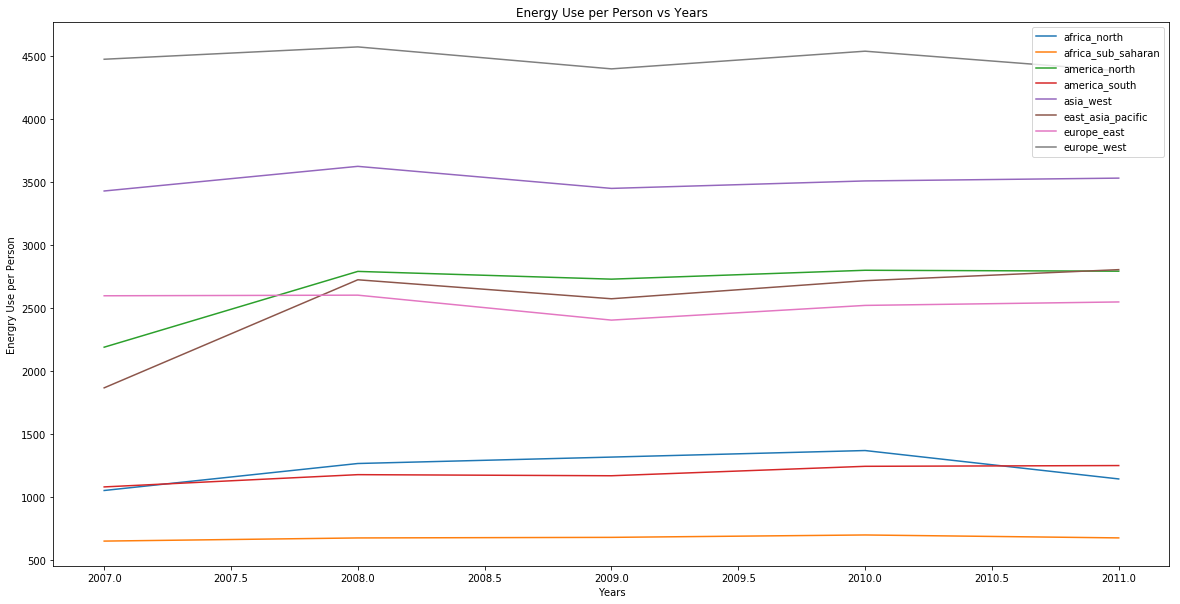

In [36]:
df_energyuse_sliced = region_energyuse.loc[:,["2007","2008","2009","2010","2011"]]

region1 = df_energyuse_sliced.iloc[0]
region2 = df_energyuse_sliced.iloc[1]
region3 = df_energyuse_sliced.iloc[2]
region4 = df_energyuse_sliced.iloc[3]
region5 = df_energyuse_sliced.iloc[4]
region6 = df_energyuse_sliced.iloc[5]
region7 = df_energyuse_sliced.iloc[6]
region8 = df_energyuse_sliced.iloc[7]

years = range(2007,2012)

plt.figure(figsize=(20,10))

plot = plt.plot(years, region1, years, region2, years, region3, years, region4, years, region5, years, region6, 
         years, region7, years, region8)

plt.legend(plot[:],('africa_north', 'africa_sub_saharan', 'america_north','america_south','asia_west', 
           'east_asia_pacific','europe_east','europe_west'))

plt.title("Energy Use per Person vs Years")
plt.ylabel("Energry Use per Person")
plt.xlabel("Years");

Changes between 2007 and 2011 is much easier to view, because we eliminated the time periods with sharp changes. For this plot, we can see increases between 2007 and 2008 for North America and East APAC, whereas most other regions have relatively smaller changes over time. Will explore visualisation by using bar chart

In [37]:
df_energyuse_mean = df_energyuse_sliced.mean(axis = 1)
df_energyuse_mean

region
africa_north          1227.606667
africa_sub_saharan     673.612606
america_north         2659.643478
america_south         1182.122727
asia_west             3508.644174
east_asia_pacific     2536.444167
europe_east           2533.791304
europe_west           4474.200000
dtype: float64

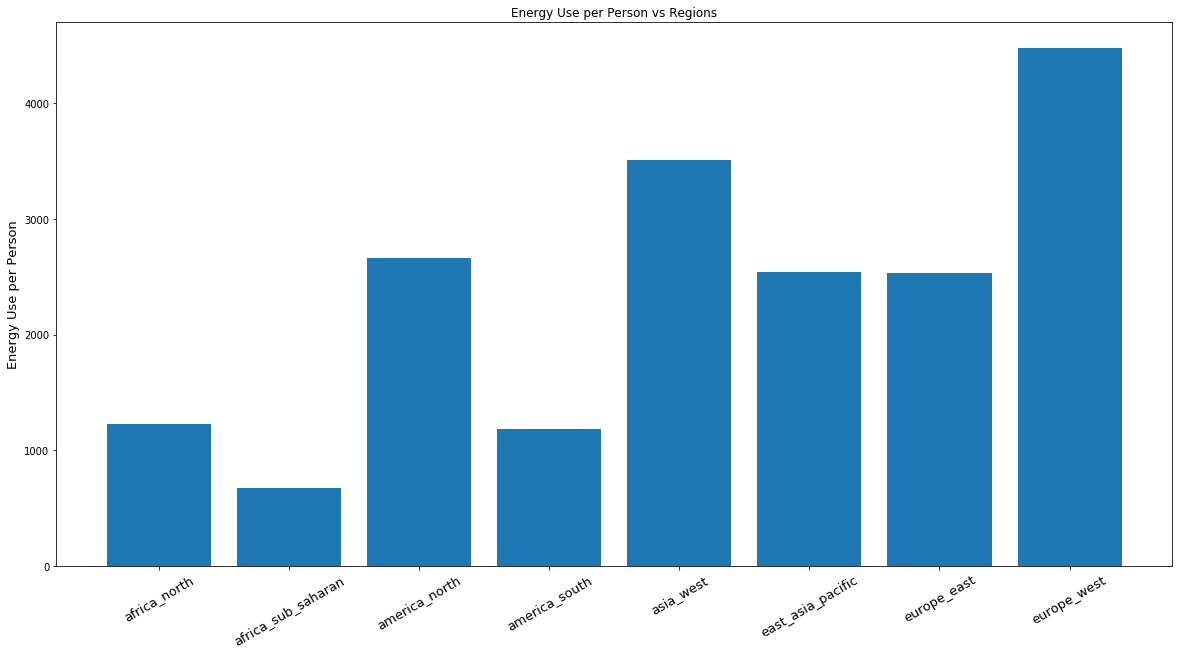

In [38]:
label = ['africa_north', 'africa_sub_saharan', 'america_north','america_south','asia_west', 
           'east_asia_pacific','europe_east','europe_west']
data = df_energyuse_mean
index = np.arange(len(label))    

barplot("Energy Use per Person vs Regions", "Energy Use per Person", index, data, label)


Bar chart is a cleaner visualisation as compared to time series, should we want to compare the mean or at a snapshot in time. The 3 most energy-hungry regions are Western Europe, West Asia and North America.

#### 2.2.7 Merging of Datasets #2 and #5 (Corruption Perception Index with Regions)

In [39]:
df_corruption_merged = df_corruption.merge(df_continent,on="country")
df_corruption_merged

,country,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,region
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.5,NaN,1.8,1.5,1.3,1.4,1.52,asia_west
1,Albania,NaN,NaN,NaN,NaN,2.3,NaN,NaN,2.5,2.5,2.5,2.4,2.6,2.9,3.4,3.2,3.3,3.05,europe_east
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.6,2.7,2.8,3.1,3.0,3.2,2.8,2.9,2.90,africa_north
3,Angola,NaN,NaN,NaN,NaN,NaN,1.7,NaN,1.7,1.8,2.0,2.0,2.2,2.2,1.9,1.9,1.9,2.01,africa_sub_saharan
4,Argentina,5.24,3.41,2.81,3.0,3.0,3.5,3.5,2.8,2.5,2.5,2.8,2.9,2.9,2.9,2.9,2.9,3.00,america_south
5,Armenia,NaN,NaN,NaN,NaN,2.5,2.5,NaN,NaN,3.0,3.1,2.9,2.9,3.0,2.9,2.7,2.6,2.63,europe_east
6,Australia,8.80,8.60,8.86,8.7,8.7,8.3,8.5,8.6,8.8,8.8,8.8,8.7,8.6,8.7,8.7,8.7,8.84,east_asia_pacific
7,Austria,7.13,7.59,7.61,7.5,7.6,7.7,7.8,7.8,8.0,8.4,8.7,8.6,8.1,8.1,7.9,7.9,7.79,europe_west
8,Azerbaijan,NaN,NaN,NaN,NaN,1.7,1.5,2.0,2.0,1.8,1.9,2.2,2.4,2.1,1.9,2.3,2.4,2.38,europe_east
9,Bahamas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.29,america_north


In [40]:
region_corruption = df_corruption_merged.groupby("region").mean()
region_corruption

,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
region,,,,,,,,,,,,,,,,,
africa_north,NaN,2.84000,NaN,3.866667,4.133333,4.333333,4.450000,3.966667,3.240000,3.320000,3.360000,3.380000,3.166667,3.250000,3.066667,3.183333,2.991667
africa_sub_saharan,5.620000,2.75000,3.355000,3.560000,3.437500,3.236842,3.146667,3.150000,2.791667,2.861290,2.794872,2.787805,2.804255,2.814894,2.840426,2.855319,2.918787
america_north,6.613333,6.64000,6.455000,4.533333,4.555556,5.960000,4.400000,4.115385,4.053333,4.143750,4.106250,3.955556,4.340000,4.478947,4.583333,4.281250,4.536316
america_south,4.396000,3.57000,3.372857,3.370000,3.530000,3.800000,3.900000,3.560000,3.520000,3.672727,3.525000,3.541667,3.575000,3.591667,3.550000,3.627273,3.575000
asia_west,2.515000,3.70400,4.416667,4.350000,3.228571,3.880000,3.328571,3.400000,3.659091,3.429167,3.484000,3.612500,3.288462,3.315385,3.330769,3.388462,3.409615
east_asia_pacific,5.356000,5.53200,5.192727,5.163636,5.075000,5.027273,5.227273,5.227273,4.723077,4.685714,4.482353,4.364706,3.977273,3.995455,4.091304,4.126087,4.013750
europe_east,5.780000,5.08000,4.796667,4.175000,3.745000,3.883333,4.093750,3.926316,3.785714,3.819048,3.895238,4.018182,4.121739,4.139130,4.126087,4.052174,3.972609
europe_west,7.185714,7.25875,7.472941,7.527778,7.505556,7.472222,7.422222,7.450000,7.515789,7.440000,7.490000,7.460000,7.375000,7.305000,7.215000,7.180000,7.239000


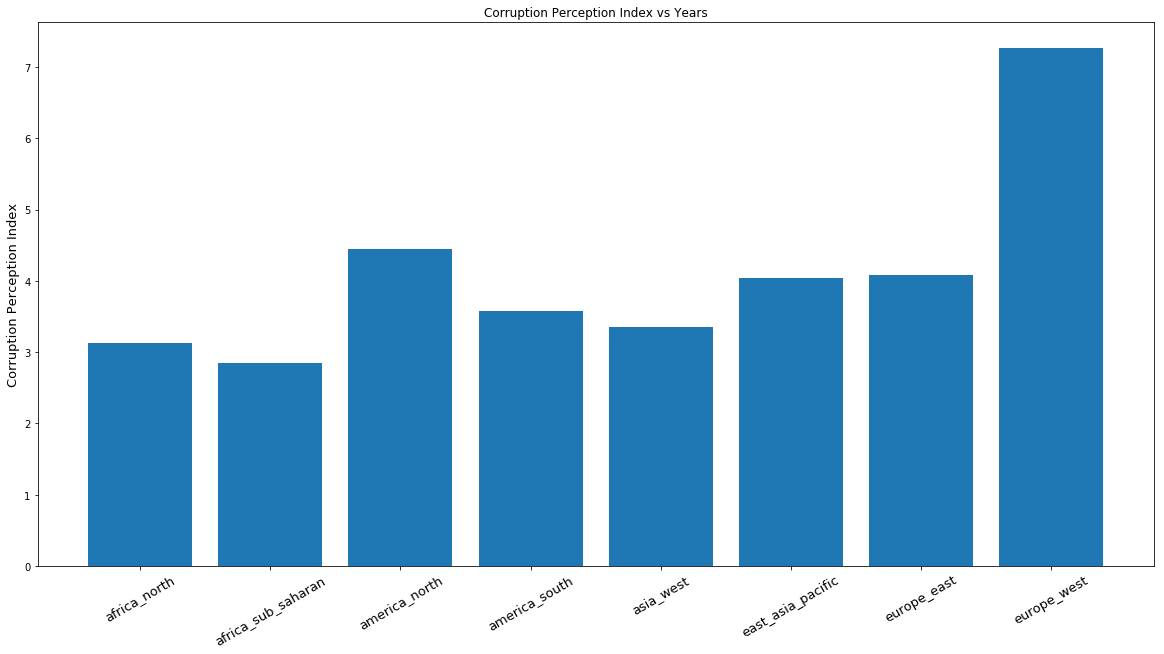

In [41]:
df_corruption_sliced = region_corruption.loc[:,["2007","2008","2009","2010","2011"]]

df_corruption_mean = df_corruption_sliced.mean(axis = 1)

label = ['africa_north', 'africa_sub_saharan', 'america_north','america_south','asia_west', 
           'east_asia_pacific','europe_east','europe_west']
data = df_corruption_mean
index = np.arange(len(label))    


barplot("Corruption Perception Index vs Years", "Corruption Perception Index", index, data, label)


Western Europe has significantly higher CPI as compared to the other regions (~40% more than the next highest region i.e. North America)

<a id='eda'></a>
## 3. Exploratory Data Analysis

### 3.1 Research Question 1: How has Income Level changed over the Years? Does regions affect Income Level?

Out of 8 regions, which region grew the fastest?  
Hypothesis: europe, north america and oceania in the 1800s and 1900s grew faster. asia and africa and south amercica grew faster in 2000s.

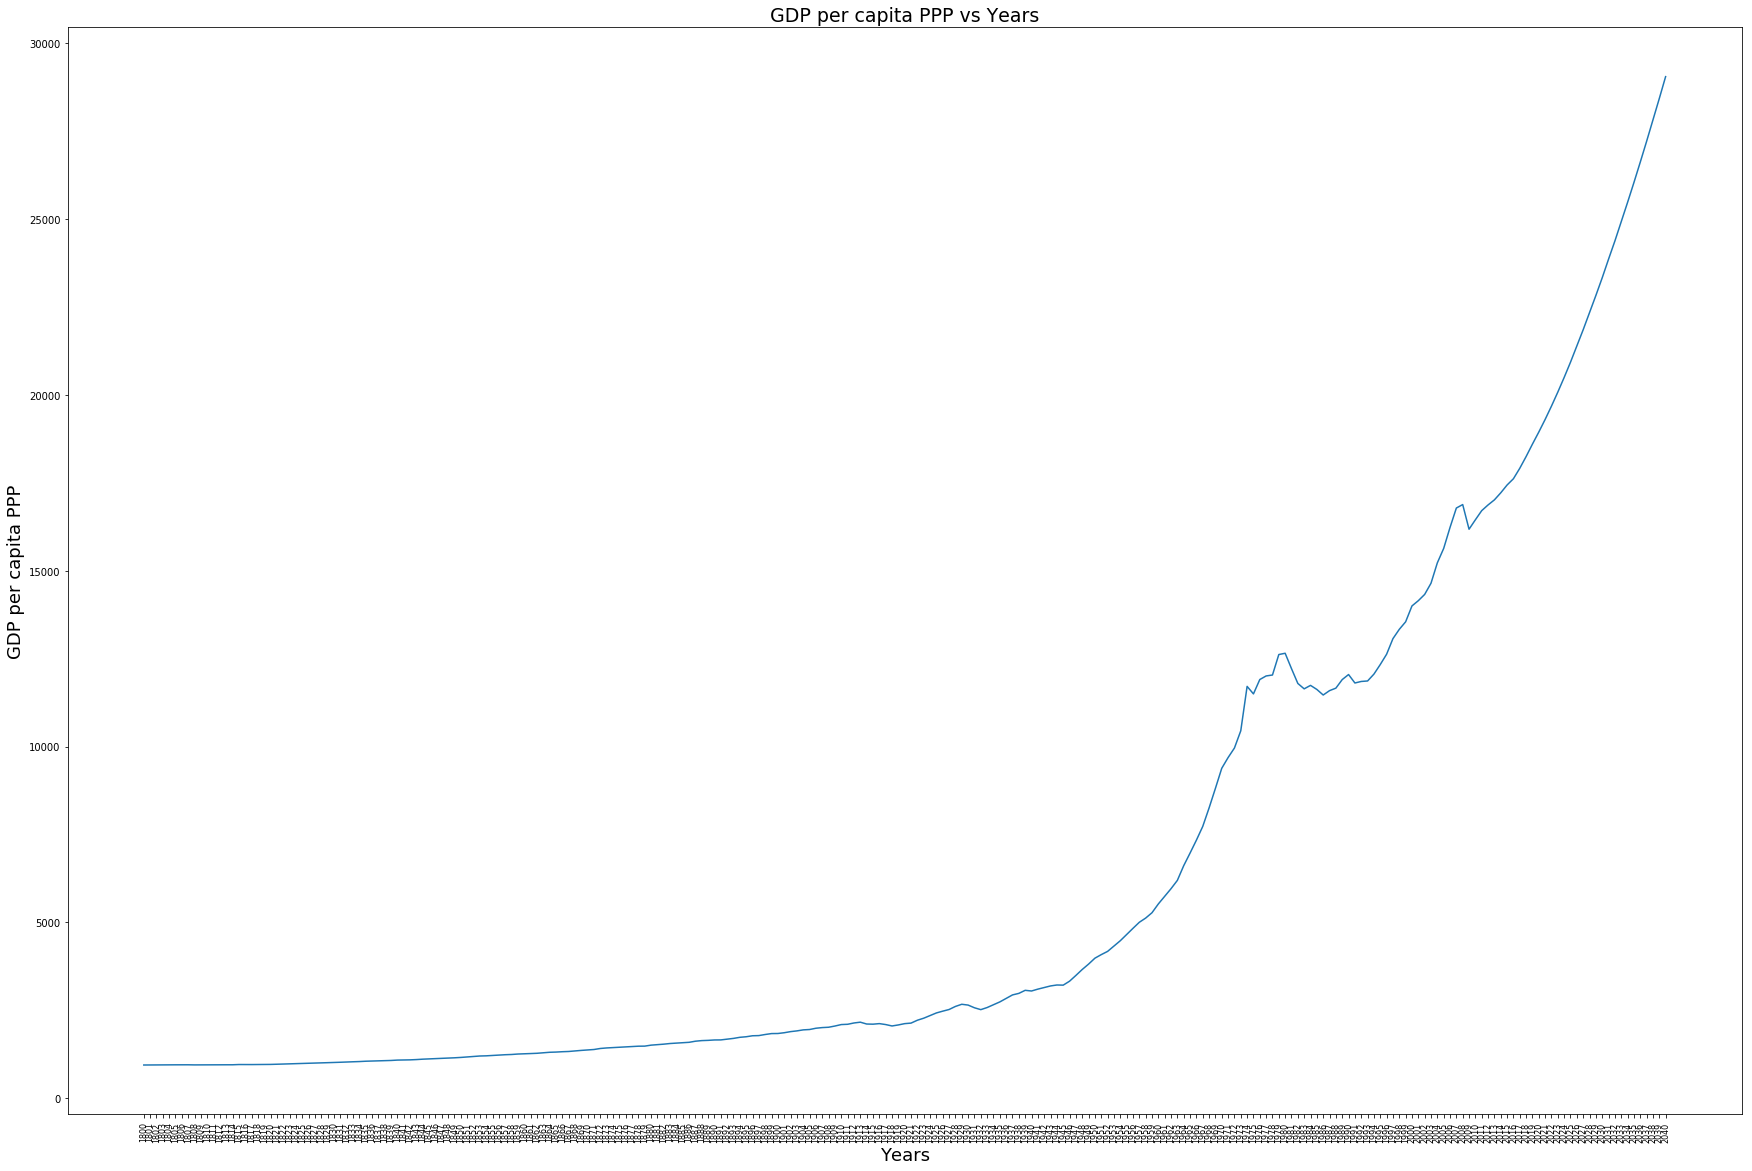

In [42]:
#explore overall gdp

plt.figure(figsize=(30,20))

plt.plot(df_gdp.mean())

plt.ylabel("GDP per capita PPP", fontsize=18)
plt.xlabel("Years", fontsize=18)
plt.title("GDP per capita PPP vs Years", fontsize=19);
plt.xticks(fontsize=8,rotation=90);

Observations: 
Exponential increase in GDP per capita as expected. Good to be aware that the figures after 2011 are predicted values


In [43]:
region_gdp = df_gdp_merged.groupby("region").mean()
region_gdp

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
region,,,,,,,,,,,,,,,,,,,,,
africa_north,789.333333,790.000000,791.000000,791.500000,792.166667,792.666667,793.166667,793.833333,794.333333,795.000000,...,17536.666667,17905.000000,18325.000000,18711.666667,19131.666667,19551.666667,19990.000000,20428.333333,20900.000000,21340.000000
africa_sub_saharan,606.437500,606.979167,607.541667,608.062500,608.645833,609.312500,609.937500,610.541667,611.104167,611.666667,...,6194.458333,6331.416667,6472.416667,6613.145833,6761.000000,6914.125000,7062.812500,7223.583333,7382.291667,7545.604167
america_north,986.000000,989.173913,991.391304,991.000000,992.000000,994.739130,997.000000,998.869565,992.913043,998.652174,...,22403.478261,22888.260870,23395.652174,23914.347826,24443.913043,24987.391304,25540.000000,26096.956522,26693.043478,27276.956522
america_south,1110.166667,1110.166667,1110.166667,1111.083333,1111.166667,1111.166667,1111.166667,1111.250000,1112.166667,1112.250000,...,17555.833333,17939.166667,18348.333333,18740.833333,19158.333333,19591.666667,20016.666667,20475.000000,20925.000000,21383.333333
asia_west,906.555556,906.925926,908.666667,908.777778,909.740741,911.333333,912.037037,912.962963,914.000000,914.925926,...,27784.444444,28392.222222,28998.148148,29663.333333,30307.777778,30982.592593,31687.777778,32390.000000,33077.777778,33811.111111
east_asia_pacific,790.533333,790.733333,790.866667,791.000000,791.466667,791.700000,791.833333,791.900000,792.266667,792.366667,...,22802.466667,23278.066667,23828.666667,24352.300000,24883.933333,25438.566667,26014.233333,26594.900000,27172.600000,27773.633333
europe_east,1004.750000,1005.708333,1006.250000,1007.250000,1008.208333,1008.833333,1009.875000,1010.416667,1011.041667,1012.041667,...,28614.166667,29246.666667,29891.666667,30540.833333,31231.666667,31931.250000,32631.250000,33352.083333,34089.583333,34844.166667
europe_west,1772.608696,1770.521739,1788.826087,1783.608696,1794.043478,1790.565217,1794.043478,1786.217391,1762.304348,1763.739130,...,58860.869565,60134.782609,61478.260870,62856.521739,64243.478261,65660.869565,67117.391304,68621.739130,70126.086957,71656.521739


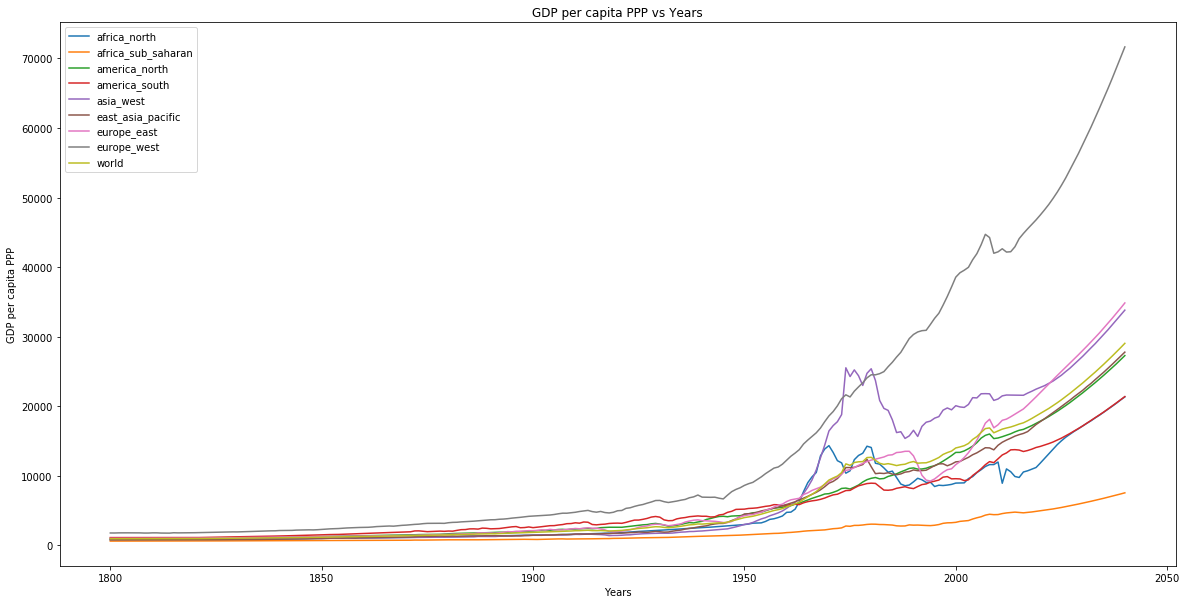

In [44]:
# plot all the lines together

region1 = region_gdp.iloc[0]
region2 = region_gdp.iloc[1]
region3 = region_gdp.iloc[2]
region4 = region_gdp.iloc[3]
region5 = region_gdp.iloc[4]
region6 = region_gdp.iloc[5]
region7 = region_gdp.iloc[6]
region8 = region_gdp.iloc[7]

years = range(1800,2041)

plt.figure(figsize=(20,10))

plot = plt.plot(years, region1, years, region2, years, region3, years, region4, years, region5, years, region6, 
         years, region7, years, region8, years, df_gdp.mean())

plt.legend(plot[:],('africa_north', 'africa_sub_saharan', 'america_north','america_south','asia_west', 
           'east_asia_pacific','europe_east','europe_west','world'))

plt.ylabel("GDP per capita PPP")
plt.xlabel("Years")
plt.title("GDP per capita PPP vs Years");


Observations: 
1. Western Europe has a far higher GDP per capita than the other regions. Hypothesis is that wealth accumulated during colonialist period increased exponentially over time till today.

2. Interesting to note that, Western Asia, which consist of the OPEC nations, is just as wealthy as Eastern Europe today. At some points in the 1980s, it is even more wealthy than Western Europe. This is likely when the oil prices spiked in the 80s. 

3. Not meaningful if goal is to examine a region's overall GDP, especially since GDP per capita does not take into consideration the population size. Case in point will be USA: Even though USA has the world's largest GDP, North America is only the 5th richest per capita out of 8 regions.

4. Increasing income gap between Sub-Saharan Africa and Europe shows rising inequality.

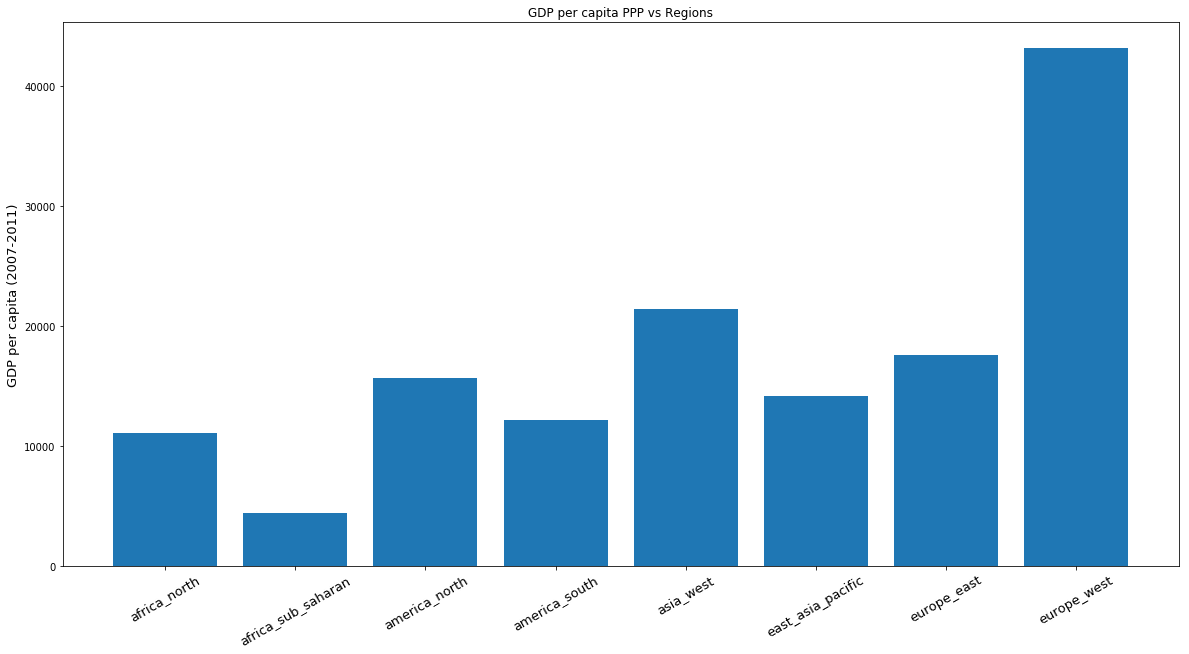

In [45]:
#Trimming the data to the time period of interest

df_gdp_sliced = region_gdp.loc[:,["2007","2008","2009","2010","2011"]]

df_gdp_mean = df_gdp_sliced.mean(axis = 1)

label = ['africa_north', 'africa_sub_saharan', 'america_north','america_south','asia_west', 
           'east_asia_pacific','europe_east','europe_west']
data = df_gdp_mean
index = np.arange(len(label))    


barplot("GDP per capita PPP vs Regions", "GDP per capita (2007-2011)", index, data, label)


Observations for the period of interest is consistent with the observations over the whole time duration.

### 3.2 Research Question 2: How do Literacy Rate and Energy Use affect Income Level?

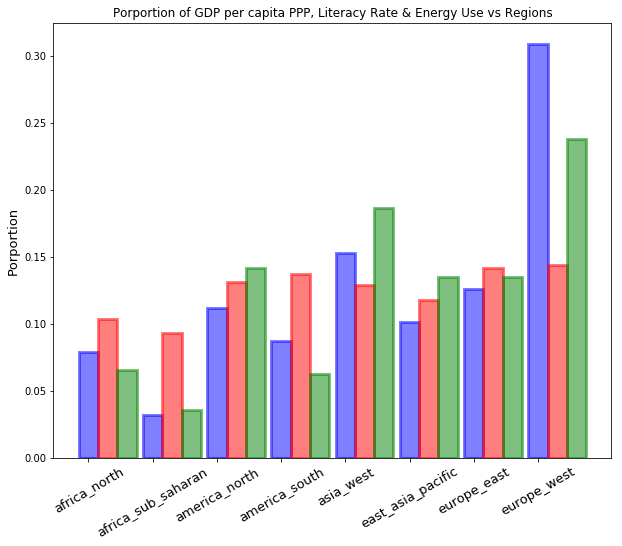

In [46]:
label = ['africa_north', 'africa_sub_saharan', 'america_north','america_south','asia_west', 
           'east_asia_pacific','europe_east','europe_west']
index = np.arange(len(label))    

plt.figure(figsize=(10,8))

#To eliminates the scaling issue when plotting different variables together on the same graph (ie literacy rate vs GDP per capita etc):
#For every region, divide value of each variable by the total of that variable, in order get create a unitless proportion on the y-axis
plt.bar(index, df_gdp_mean/df_gdp_mean.sum(), width=0.3, facecolor='b', edgecolor='b', linewidth=3, alpha=.5)
plt.bar(index+0.3, df_lit_mean/df_lit_mean.sum(), width=0.3, facecolor='r', edgecolor='r', linewidth=3, alpha=.5)
plt.bar(index+0.6, df_energyuse_mean/df_energyuse_mean.sum(), width=0.3, facecolor='g', edgecolor='g', linewidth=3, alpha=.5)

plt.xticks(index,label,fontsize=13,rotation=30);
plt.ylabel("Porportion",fontsize=13)
plt.title("Porportion of GDP per capita PPP, Literacy Rate & Energy Use vs Regions");

Literacy rate (red) is slightly positively correlated to income level (blue) between 2007 and 2011:
1. Low literacy rates in North Africa and Sub-Saharan Africa correspond to low income levels
2. Literacy rates of the other regions are all relatively higher, but some income levels are high, while others are low (e.g. South America)

Energy use (green) is very positively correlated to income level (blue) between 2007 and 2011
1. Low energy use in Sub-Saharan Africa correspond to low income levels
2. High energy use in Western Europe correspond to high income levels

### 3.3 Research Question 3: Does Income Level affect Perceived Level of Corruption?

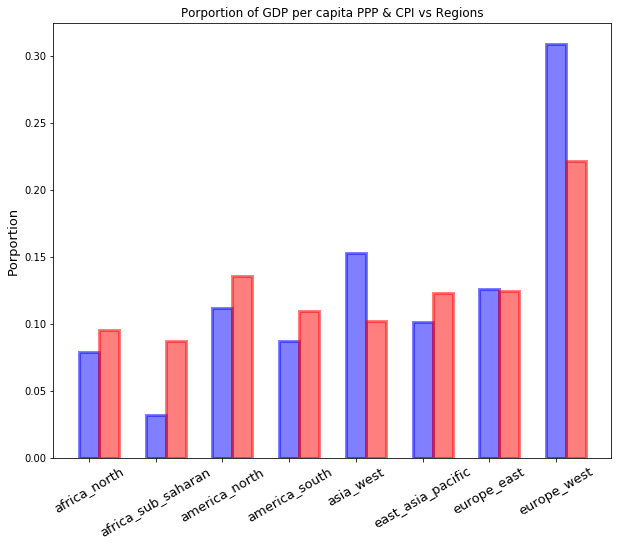

In [47]:
label = ['africa_north', 'africa_sub_saharan', 'america_north','america_south','asia_west', 
           'east_asia_pacific','europe_east','europe_west']
index = np.arange(len(label))    

plt.figure(figsize=(10,8))

#To eliminates the scaling issue when plotting different variables together on the same graph (ie literacy rate vs GDP per capita etc):
#For every region, divide value of each variable by the total of that variable, in order get create a unitless proportion on the y-axis
plt.bar(index, df_gdp_mean/df_gdp_mean.sum(), width=0.3, facecolor='b', edgecolor='b', linewidth=3, alpha=.5)
plt.bar(index+0.3, df_corruption_mean/df_corruption_mean.sum(), width=0.3, facecolor='r', edgecolor='r', linewidth=3, alpha=.5)

plt.xticks(index,label,fontsize=13,rotation=30);
plt.ylabel("Porportion",fontsize=13)
plt.title("Porportion of GDP per capita PPP & CPI vs Regions");

General positive correlation between income level (blue) and corruption perception index (red) between 2007 and 2011. Eg. Western Europe has the highest income level and CPI, whereas in Sub-Saharan Africa both indicators are low.

A hypothesis is that in more wealthy regions, economic development has brought prosperity. As such, the public do not perceive the government to be corrupt.

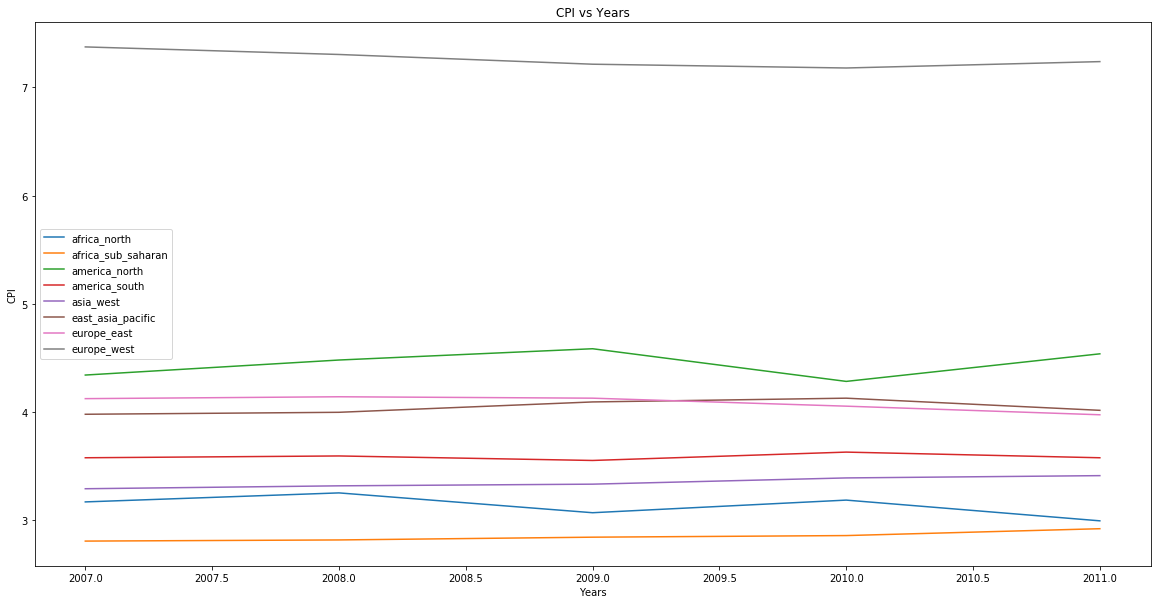

In [48]:
# plot all the lines together

region1 = df_corruption_sliced.iloc[0]
region2 = df_corruption_sliced.iloc[1]
region3 = df_corruption_sliced.iloc[2]
region4 = df_corruption_sliced.iloc[3]
region5 = df_corruption_sliced.iloc[4]
region6 = df_corruption_sliced.iloc[5]
region7 = df_corruption_sliced.iloc[6]
region8 = df_corruption_sliced.iloc[7]

years = range(2007,2012)

plt.figure(figsize=(20,10))

plot = plt.plot(years, region1, years, region2, years, region3, years, region4, years, region5, years, region6, 
         years, region7, years, region8)

plt.legend(plot[:],('africa_north', 'africa_sub_saharan', 'america_north','america_south','asia_west', 
           'east_asia_pacific','europe_east','europe_west'))

plt.title("CPI vs Years")
plt.ylabel("CPI")
plt.xlabel("Years");

A closer look into the trendline for each region shows that even if income level is increasing, the CPI is decreasing (i.e. Western Europe).

A hypothesis is that underlying the GDP per capita growth, there is a rising wealth gap between the region's rich/elite and poor/proletariat. This could be the reason why wealth accumulated in region of high income level is more generally not perceived to be "clean". 

<a id='conclusions'></a>
## Conclusions

In conclusion, the project shows several interesting observations of income level, literacy rate, energy use and corruption perception index over the years. There are also two main correlations:
1. Positive correlation between the dependent variable income level and independent variables literacy rate and energy use
2. Positive correlation between the dependent variable corruption perception index and independent variable income level

The data is relatively clean. Given the large number of countries, it is necessary to group the countries into regions in order to conduct a meaningful analysis to tackle the research questions. While the income level dataset is very complete, the same cannot be said regarding the other 3 datasets. As such, it is necessary trim the data to select a specific time period of interest (i.e. 2007 to 2011) to analyze the correlations.

## Resources

https://www.gapminder.org/data/